<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 3, Due: Tuesday October 17th, 3pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

## Questions 
### From Class 5:


1) Write a Python program (function!) to subtract five days from current date

2) Write a Python program (function!) to add 5 seconds with current time

3) Write a Python program (function!) to get a list of dates between two dates

4) Calculate the difference (function!) in days between the unix Epoch and your birthdate

In [1]:
import datetime
#first 4 questions goes like:

In [53]:
def DeLorean():
    #a time machine default setup 5 days backwards 
    import datetime
    FiveDaysBefore = datetime.datetime.now() - datetime.timedelta(5)
    return ("5 days ago it was " + str(FiveDaysBefore.strftime("%Y-%m-%d %H:%M:%S")) + ", Marti!")

DeLorean()

'5 days ago it was 2017-10-12 12:43:06, Marti!'

In [54]:
def DeLorean2():
    #a time machine going back to the future 
    import datetime
    FiveSecsForwards = datetime.datetime.now() + datetime.timedelta(seconds = 5)
    return ("5 seconds from now will be " + str(FiveSecsForwards.strftime("%Y-%m-%d %H:%M:%S")) + ", Marti!")


DeLorean2()



'5 seconds from now will be 2017-10-17 12:43:28, Marti!'

In [55]:
import datetime

date1 = datetime.date(1965, 5, 15)
date2 = datetime.date(1985, 5, 15)

def DeLorean3(date1, date2):
    import datetime
    #Flux Capacitor: input your dates and it returns a list of dates between them
    destination_time    = date1 
    date_of_time_travel = date2 

    delta = date_of_time_travel - destination_time

    date_list = [destination_time + datetime.timedelta(days=i) for i in range(delta.days + 1)]
    return date_list

print(DeLorean3(date1, date2)[0])
print("##################")
print(DeLorean3(date1, date2)[-1])


1965-05-15
##################
1985-05-15


In [56]:
def BirthUnixDays():
    import datetime
    # Calculate the difference (function!) in days between the unix Epoch and your birthdate
    # or what was the unix count on your birthday
    # we know the epoch date, it is default Thursday, 1 January 1970
    epoch = datetime.date(1970, 1, 1)
    birth = datetime.date(1981, 6, 6)

    delta = birth - epoch
    return print(delta)

BirthUnixDays()

4174 days, 0:00:00


### From Class 6:

1) Create a for loop over all years and months between 2010 and 2011, in each loop download the json exchange data for each month, and save it to a big dictionary called ``time2data``, where keys are (year,month) tuples.
*Important*: It should take only a few seconds. If you are not sure your code works, test only with a few months, as you can reach the rate limit.

2) Register for the API, and create your own app_id key

3) Get the exchange rate HUF vs USD from 2000 to 2010, but every six months. Plot it on a plot.

4) Get the exchange rate EUR vs USD from 2000 to 2010 monthly (careful with API rate limits! Test with, say, one year of data, and then request the rest). Plot it.

5) Combine the two previous trends in one plot: put EUR vs USD in the main plot and HUF vs USD in an insert. Use different colors, and different symbols.



Answers From Class 6:

1)

In the following questions I will use some functions to get the list of dates. However, in this first one I want to use the method I have created myself

In [2]:
#Libraries I will use:
import urllib.request
import json

#We will do this in 6 steps

#First, create a datelist covering the time period of interest.
datelist = ['']*12
year1 = ["2010-0%s-01" % str(i+1) if i < 9 else "2010-%s-01" % str(i+1) for i in range(len(datelist))]
year2 = ["2011-0%s-01" % str(i+1) if i < 9 else "2011-%s-01" % str(i+1) for i in range(len(datelist))]

datelist = year1 + year2

#Second, my own app_id, I already created it
app_id = open("C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class6/api_id.txt").read().strip()

#Third, get the url list 
url_list = []
for date in datelist:   
    base_url = "http://openexchangerates.org/api"
    id_str   = "app_id=%s" % app_id
    url_list.append("%s/historical/%s.json?%s" % (base_url, date, id_str))

#Fourth, make requests and get the text files
text_files = []
for url in url_list:   
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    text_files.append(result.read())
    
#Fifth, json loads
data = [json.loads(text_files[i]) for i in range(len(text_files))]

#Sixth, creation of time2data dict
time2data = {}
for i in range(len(datelist)):
    time2data[(datelist[i][:4], datelist[i][5:7])] = data[i]



In [3]:
#query one of the dates.. Looks good!
time2data[('2010', '11')]['rates']['EUR']

0.719823

2) Register for the API, and create your own app_id key. <b>I have already done it and used it in the first question

3) Get the exchange rate HUF vs USD from 2000 to 2010, but every six months. Plot it on a plot. 

In [2]:
#I will use this function this time, not DeLorean3, i was surfing internet for a more efficient way.
from datetime import date, datetime, timedelta
import urllib.request
import json

def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

datelist = []
for result in perdelta(date(2000, 1, 1), date(2010, 12, 12), timedelta(days=180)):
    datelist.append(result)
    

app_id = open("C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class6/api_id.txt").read().strip()


url_list = []
for date in datelist:   
    base_url = "http://openexchangerates.org/api"
    id_str   = "app_id=%s" % app_id
    url_list.append("%s/historical/%s.json?%s" % (base_url, date, id_str))


text_files = []
for url in url_list:   
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    text_files.append(result.read())
    

data = [json.loads(text_files[i]) for i in range(len(text_files))]

dic = {}
for i in range(len(datelist)):
    dic[(datelist[i].year, datelist[i].month)] = data[i]
    


In [5]:
dic[(2005, 6)]['rates']['HUF'] # i have a value for every 180 days

204.074257

In [6]:
import datetime
print(datetime.datetime.fromtimestamp(int(dic[(2005, 6)]['timestamp'])).strftime('%Y-%m-%d'))

#dic[(2005, 6)]['timestamp']

2005-06-03


In [27]:
from datetime import datetime
HUFlist = []
HUFdates = []
for key in dic:
    HUFlist.append((dic[key]["rates"]["HUF"]))
    HUFdates.append(datetime.fromtimestamp(dic[key]["timestamp"]))




In [15]:
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

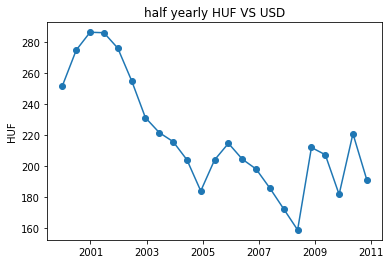

In [48]:
plt.plot(HUFdates, HUFlist, '-o')
plt.title("half yearly HUF VS USD")
plt.ylabel("HUF")
plt.show()

4) Get the exchange rate EUR vs USD from 2000 to 2010 monthly (careful with API rate limits! Test with, say, one year of data, and then request the rest). Plot it.

In [29]:
#use the same perdelta fucntion for 30 days interval
from datetime import date, datetime, timedelta
def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta
        
datelist = []
for result in perdelta(date(2000, 1, 1), date(2010, 12, 12), timedelta(days=30)):
    datelist.append(result)
    

app_id = open("C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class6/api_id.txt").read().strip()


url_list = []
for date in datelist:   
    base_url = "http://openexchangerates.org/api"
    id_str   = "app_id=%s" % app_id
    url_list.append("%s/historical/%s.json?%s" % (base_url, date, id_str))


text_files = []
for url in url_list:   
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    text_files.append(result.read())
    

data = [json.loads(text_files[i]) for i in range(len(text_files))]

dic2 = {}
for i in range(len(datelist)):
    dic2[(datelist[i].year, datelist[i].month)] = data[i]


In [30]:
dic2[(2005, 2)]['rates']['EUR'] #test

0.77092

In [31]:
EURlist = []
EURdates = []
for key in dic2:
    
    EURlist.append((dic2[key]["rates"]["EUR"]))
    EURdates.append(datetime.fromtimestamp(dic2[key]["timestamp"]))



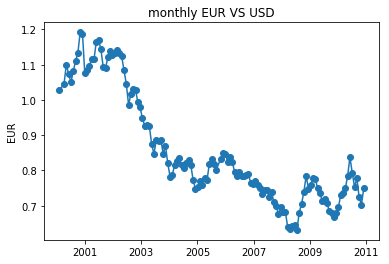

In [47]:
plt.plot(EURdates, EURlist, '-o')
plt.title("monthly EUR VS USD")
plt.ylabel("EUR")
plt.show()

5) Combine the two previous trends in one plot: put EUR vs USD in the main plot and HUF vs USD in an insert. Use different colors, and different symbols.

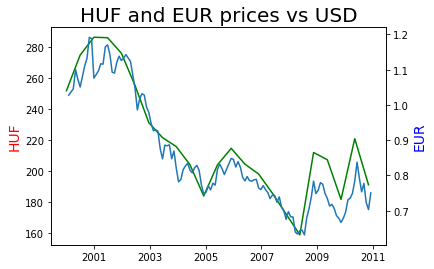

In [38]:
#this one is a trial plot, i wanted to experiment on axes

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(HUFdates, HUFlist, color = 'green')
ax2.plot(EURdates, EURlist)
ax.set_ylabel("HUF",fontsize=14,color='red')
ax2.set_ylabel("EUR",fontsize=14,color='blue')

plt.title("HUF and EUR prices vs USD", fontsize=20,color='black')

plt.show()



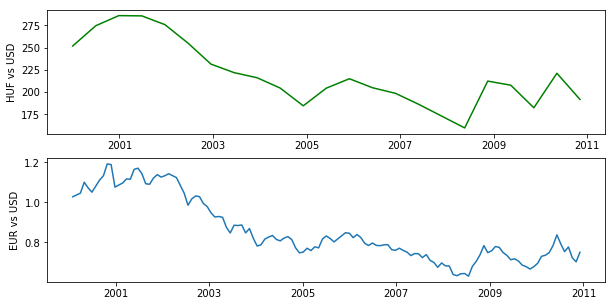

In [49]:
#of course it is possible to plot them like mainplot and subplot


plt.figure(1, figsize=(10, 5))
plt.subplot(211)
plt.plot(HUFdates, HUFlist, color = 'green')
plt.ylabel("HUF vs USD")

plt.subplot(212)
plt.plot(EURdates, EURlist)
plt.ylabel("EUR vs USD")

plt.show()
